In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel("data/cleaned_dataset/experiment_data/discharge_df_v6.xlsx")
df.replace('[]', np.nan, inplace=True)
df.isna().sum()
df.dropna(inplace=True)

In [4]:
df.columns

Index(['Unnamed: 0', 'type', 'start_time', 'ambient_temperature', 'battery_id',
       'test_id', 'uid', 'filename', 'Capacity', 'RUL',
       'Voltage_measured_mean', 'Current_measured_mean',
       'Temperature_measured_mean', 'Current_load_mean', 'Voltage_load_mean',
       'Voltage_measured_median', 'Current_measured_median',
       'Temperature_measured_median', 'Current_load_median',
       'Voltage_load_median', 'Voltage_measured_std', 'Current_measured_std',
       'Temperature_measured_std', 'Current_load_std', 'Voltage_load_std',
       'battery_group'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,RUL,...,Current_measured_median,Temperature_measured_median,Current_load_median,Voltage_load_median,Voltage_measured_std,Current_measured_std,Temperature_measured_std,Current_load_std,Voltage_load_std,battery_group
0,3,discharge,2008-04-02 15:25:41,24,B0005,1,5122,05122.csv,1.856487421,3690.234,...,-2.012427,32.865786,-1.9982,2.6100,0.236558,0.595058,3.495804,0.591217,0.796974,1
1,4,discharge,2008-04-02 15:25:41,24,B0007,1,5738,05738.csv,1.891052295,3690.234,...,-1.990024,32.747709,-2.0000,2.6030,0.288178,0.476508,3.892063,0.479455,0.659538,1
2,5,discharge,2008-04-02 15:25:41,24,B0006,1,4506,04506.csv,2.035337591,3690.234,...,-2.010775,32.352429,-1.9992,2.6510,0.226595,0.202011,3.460482,0.200853,0.304399,1
3,9,discharge,2008-04-02 19:43:48,24,B0005,3,5124,05124.csv,1.84632725,3672.344,...,-2.012368,32.968785,-1.9982,2.6045,0.235366,0.596704,3.435509,0.592561,0.796596,1
4,10,discharge,2008-04-02 19:43:48,24,B0007,3,5740,05740.csv,1.880637028,3672.344,...,-1.989573,32.865281,-2.0000,2.6105,0.280425,0.477820,3.777426,0.480583,0.659843,1


In [6]:
#removing the indentifier columns

df = df[['ambient_temperature', 'Capacity', 'RUL',
       'Voltage_measured_mean', 'Current_measured_mean',
       'Temperature_measured_mean', 'Current_load_mean', 'Voltage_load_mean']]

In [7]:
df["Capacity"] = df["Capacity"].astype(float)
df.dtypes 

ambient_temperature            int64
Capacity                     float64
RUL                          float64
Voltage_measured_mean        float64
Current_measured_mean        float64
Temperature_measured_mean    float64
Current_load_mean            float64
Voltage_load_mean            float64
dtype: object

In [8]:
# Determine min and max values of "RUL" column
min_rul = df["RUL"].min()
max_rul = df["RUL"].max()

# Define the intervals and labels based on min and max values
intervals = [min_rul - 1, 2000, 4000, max_rul]
labels = ['Low', 'High', 'Very High']

# Discretizing the "RUL" column
df['RUL_category'] = pd.cut(df["RUL"], bins=intervals, labels=labels)

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame containing the specified columns
# Replace this with your actual DataFrame
# For example:
# df = pd.read_csv('your_data.csv')


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(df[[
       'Voltage_measured_mean', 'Current_measured_mean',
       'Temperature_measured_mean', 'Current_load_mean', 'Voltage_load_mean']])

# Create a DataFrame from the normalized data
df_norm= pd.DataFrame(normalized_data, columns=[
       'Voltage_measured_mean', 'Current_measured_mean',
       'Temperature_measured_mean', 'Current_load_mean', 'Voltage_load_mean'])

# Display the normalized DataFrame
display(df_norm)


,Voltage_measured_mean,Current_measured_mean,Temperature_measured_mean,Current_load_mean,Voltage_load_mean
0,0.520049,0.546660,0.512312,0.029185,0.630947
1,0.515980,0.533887,0.513283,0.016950,0.649025
2,0.534153,0.503128,0.504372,0.000000,0.696456
3,0.523945,0.546950,0.515138,0.029352,0.629428
4,0.521151,0.534160,0.515378,0.017054,0.651638
...,...,...,...,...,...
2763,0.269417,0.536666,0.170323,0.644356,0.496991
2764,0.421894,0.580443,0.121174,0.618864,0.486723
2765,0.426326,0.570999,0.103425,0.624224,0.510436
2766,0.796225,0.837213,0.024160,0.445565,0.612879


In [11]:
df_norm.to_excel("data/cleaned_dataset/experiment_data/discharge_df_v7.xlsx")

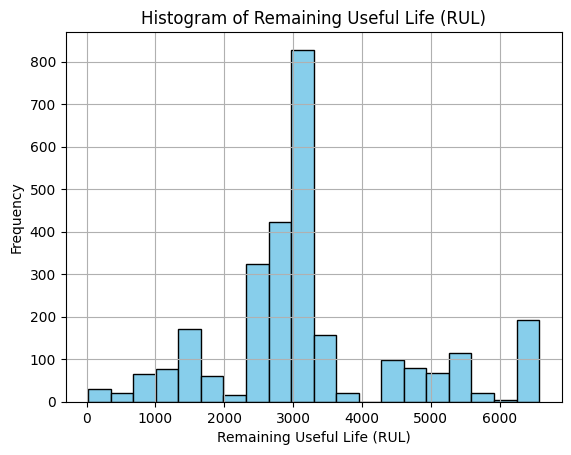

In [130]:
import matplotlib.pyplot as plt

# Assuming df["RUL"] contains the data you want to plot
# Replace 'RUL' with the actual column name if different
# Replace 'Your Title' with an appropriate title for your histogram
plt.hist(df["RUL"], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Remaining Useful Life (RUL)')
plt.ylabel('Frequency')
plt.title('Histogram of Remaining Useful Life (RUL)')
plt.grid(True)
plt.show()


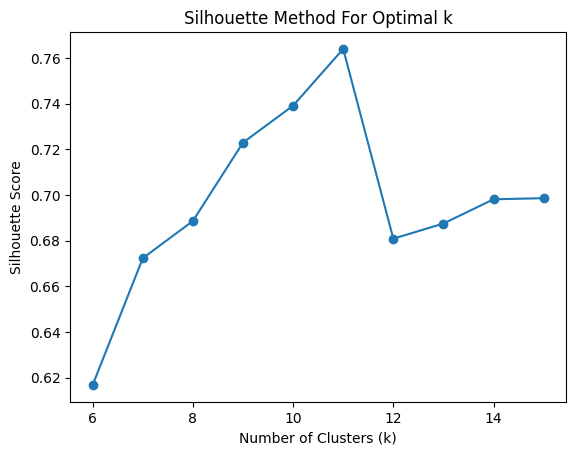

Optimal number of clusters (k): 11


In [124]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Replace this with your actual DataFrame
# For example:
# df = pd.read_csv('your_data.csv')

# Assuming df contains features you want to cluster on
# Replace 'feature1', 'feature2', ... with your actual feature column names
features = df_norm
# Range of k values to try
k_values = range(6, 16)  # Try k values from 2 to 10

# Initialize lists to store silhouette scores
silhouette_scores = []

# Iterate through each k value and calculate silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_avg = silhouette_score(features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting silhouette scores to find the optimal k
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()

# Finding the optimal k value with the highest silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print("Optimal number of clusters (k):", optimal_k)

# Proceed with KMeans clustering using the optimal k value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster_label'] = kmeans.fit_predict(features)

# Now df contains an additional column 'cluster_label' with the assigned cluster labels
# You can further analyze or visualize the clusters as needed


In [125]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming df1 is your DataFrame
# Replace this with your actual DataFrame
# For example:
# df1 = pd.read_csv('your_data.csv')

# Assuming df1 contains features you want to cluster on
# Replace 'feature1', 'feature2', ... with your actual feature column names
features = df1 # Replace 'feature1', 'feature2', ... with your actual feature column names

# Initialize KMeans with 7 clusters
kmeans = KMeans(n_clusters=11, random_state=42)

# Fit KMeans to the data
kmeans.fit(features)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
df['cluster_label'] = cluster_labels


# Didisplay the DataFrame with cluster labels
display(df)


,ambient_temperature,Capacity,RUL,Voltage_measured_mean,Current_measured_mean,Temperature_measured_mean,Current_load_mean,Voltage_load_mean,RUL_category,cluster_label
0,24,1.856487,3690.234,3.529829,-1.818702,32.572328,-1.805570,2.404944,High,6
1,24,1.891052,3690.234,3.522007,-1.869119,32.624859,-1.878200,2.472594,High,6
2,24,2.035338,3690.234,3.556946,-1.990533,32.142778,-1.978823,2.650081,High,6
3,24,1.846327,3672.344,3.537320,-1.817560,32.725235,-1.804583,2.399260,High,6
4,24,1.880637,3672.344,3.531949,-1.868042,32.738210,-1.877584,2.482372,High,6
...,...,...,...,...,...,...,...,...,...,...
2788,4,0.837392,2357.687,3.047978,-1.858151,14.071709,1.846293,1.903679,High,7
2789,4,0.990759,2357.687,3.341122,-1.685356,11.412928,1.694961,1.865255,High,9
2791,4,1.129059,2357.687,3.349642,-1.722633,10.452748,1.726779,1.953989,High,9
2792,4,0.000000,23.000,4.060790,-0.671836,6.164759,0.666200,2.337333,Low,8


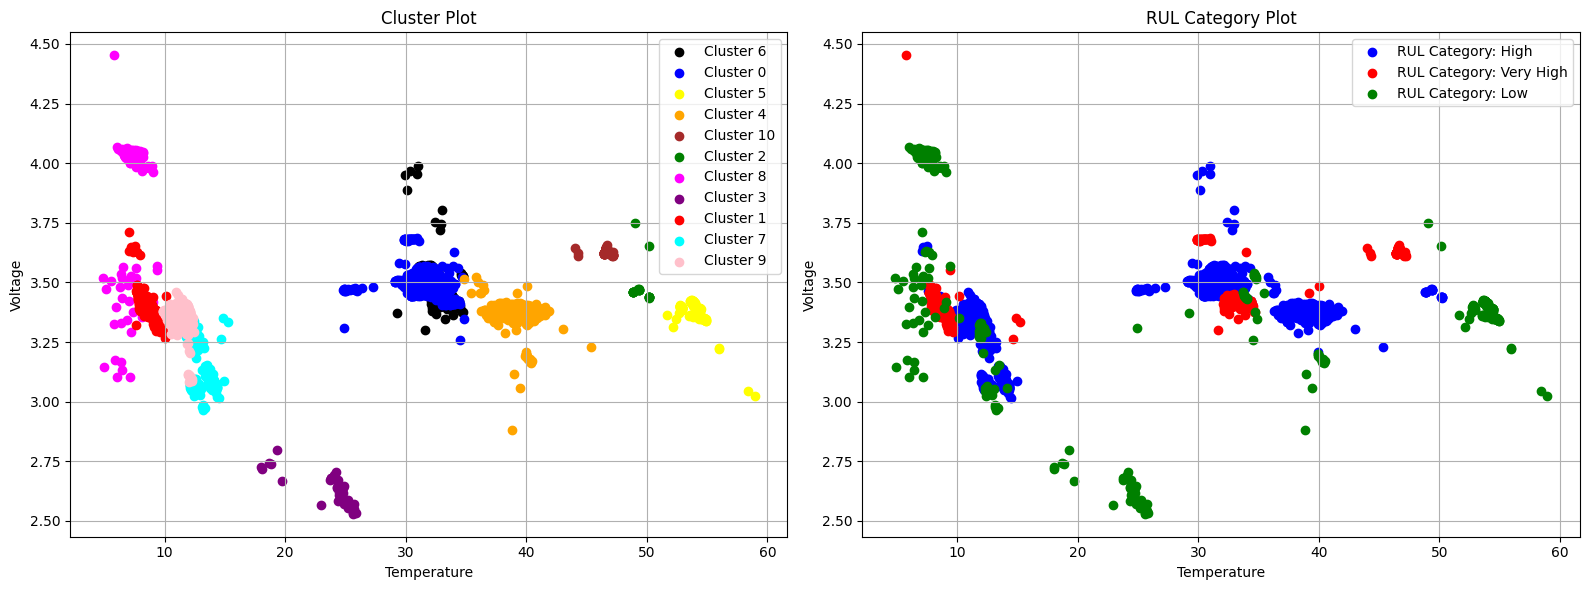

In [126]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with columns 'Capacity', 'Voltage', 'cluster_label', and 'RUL_Category'
# indicating cluster assignments and RUL categories respectively

# Define colors for each cluster
colors = ['blue', 'red', 'green', 'purple', 'orange', 'yellow', 'black' ,'cyan', 'magenta', 'pink', 'brown']  # Add more colors if needed

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot 1: Cluster Plot
for cluster in df['cluster_label'].unique():
    axes[0].scatter(df[df['cluster_label'] == cluster]['Temperature_measured_mean'], 
                    df[df['cluster_label'] == cluster]['Voltage_measured_mean'], 
                    color=colors[cluster], label=f'Cluster {cluster}')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Voltage')
axes[0].set_title('Cluster Plot')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Plot colored by RUL_Category
rul_categories = df['RUL_category'].unique()
for rul_category, color in zip(rul_categories, colors):
    axes[1].scatter(df[df['RUL_category'] == rul_category]['Temperature_measured_mean'], 
                    df[df['RUL_category'] == rul_category]['Voltage_measured_mean'], 
                    color=color, label=f'RUL Category: {rul_category}')
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('Voltage')
axes[1].set_title('RUL Category Plot')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()



In [129]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



# Get cluster labels
cluster_labels = kmeans.labels_

# Initialize PCA with 3 components for 3D visualization
pca = PCA(n_components=3)

# Fit PCA to the data and transform it to 3D
pca_data = pca.fit_transform(df_norm)

# Create a DataFrame with PCA-transformed data and cluster labels
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = cluster_labels

# Plotly 3D scatter plot
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Cluster', symbol='Cluster')
fig.update_layout(title='KMeans Clustering Visualization (3D PCA)')
fig.show()